In [1]:
import Pkg 

In [2]:
Pkg.add("AbstractAlgebra")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/Programming/t_value_experiments/Project.toml`
  No Changes to `~/Documents/Programming/t_value_experiments/Manifest.toml`


In [3]:
Pkg.add("Random")

   Resolving package versions...
    Updating `~/Documents/Programming/t_value_experiments/Project.toml`
  [9a3f8284] + Random
  No Changes to `~/Documents/Programming/t_value_experiments/Manifest.toml`


In [4]:
Pkg.add("Permutations")

   Resolving package versions...
    Updating `~/Documents/Programming/t_value_experiments/Project.toml`
  [2ae35dd2] + Permutations v0.4.21
  No Changes to `~/Documents/Programming/t_value_experiments/Manifest.toml`


In [5]:
Pkg.add("CairoMakie")

   Resolving package versions...
  No Changes to `~/Documents/Programming/t_value_experiments/Project.toml`
  No Changes to `~/Documents/Programming/t_value_experiments/Manifest.toml`


In [3]:
using AbstractAlgebra, Random, Permutations
b= 2
F = GF(b)
m = 4 
s = 2
ρ = m 
t = m - ρ 
N = b^m

16

In [60]:
#all_perms = collect(PermGen(m)) 
#number_perm = length(all_perms)
#@show number_perm
# inds = rand(1:length(all_perms), s)
#@show inds = (1,120)
#C = [Matrix(all_perms[i]) for i in inds]


In [4]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

16-element Vector{NTuple{4, Int64}}:
 (0, 0, 0, 0)
 (1, 0, 0, 0)
 (0, 1, 0, 0)
 (1, 1, 0, 0)
 (0, 0, 1, 0)
 (1, 0, 1, 0)
 (0, 1, 1, 0)
 (1, 1, 1, 0)
 (0, 0, 0, 1)
 (1, 0, 0, 1)
 (0, 1, 0, 1)
 (1, 1, 0, 1)
 (0, 0, 1, 1)
 (1, 0, 1, 1)
 (0, 1, 1, 1)
 (1, 1, 1, 1)

In [5]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [6]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [7]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [8]:
function point_gen(C,n,b)
    #v = [norm_coord(c*n,b) for c in C]
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]  # you need to apply lift here! Like this? yes! Yay now the plot looks correct! Juhu! 
    return v
end

point_gen (generic function with 1 method)

In [9]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [10]:
vol(z) = prod(z)
vol_h(z, pts) = count( all(p .< z) for p in pts ) / length(pts)
δ(z,pts) = vol_h(z, pts) - vol(z)

δ (generic function with 1 method)

In [11]:
function is_NNLD(c_z, s, pts)
    NNLD = true
    for i in 1:c_z 
        z = rand(s)
        if δ(z,pts) < 0
            @show z
            NNLD = false
            break
        end
    end
    return NNLD
end


is_NNLD (generic function with 1 method)

In [10]:
C_1 = [[1 0];[0 1]]
C_2 = [[0 1];[1 0]]
C_1, C_2 = F.(C_1), F.(C_2)
C = [C_1,C_2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [1 0; 0 1]
 [0 1; 1 0]

In [69]:
#Testing 851,849
C_1 = [[2 1 1];[1 1 0]; [1 0 0]]
C_2 = [[0 1 1];[1 1 0]; [1 0 0]]
C_1, C_2 = F.(C_1), F.(C_2)
C = [C_1,C_2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [2 1 1; 1 1 0; 1 0 0]
 [0 1 1; 1 1 0; 1 0 0]

In [70]:

C_r1 = [[1 0 0];[0 2 0]; [0 0 1]]
C_r2 = [[0 0 1];[1 0 0];[1 1 0] ]
C_r1, C_r2 = F.(C_r1), F.(C_r2)
C_r = [C_r1,C_r2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0; 0 2 0; 0 0 1]
 [0 0 1; 1 0 0; 1 1 0]

In [104]:
C_tr1 = [[1 0 0];[0 1 0]; [0 0 1]]
C_tr2 = [[1 0 0];[1 1 0];[0 1 1] ]
C_tr1, C_tr2 = F.(C_tr1), F.(C_tr2)
C_tr = [C_tr1,C_tr2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0; 0 1 0; 0 0 1]
 [1 0 0; 1 1 0; 0 1 1]

In [91]:
# Faure sequence net for s=2, m=5 and b=2. This is not an NNLD net.
#C_1 = [[1 0 0 0 0];[0 1 0 0 0]; [0 0 1 0 0]; [0 0 0 1 0]; [0 0 0 0 1]]
#C_2 = [[1 1 1 1 1]; [0 1 0 1 0]; [0 0 1 1 0]; [0 0 0 1 0]; [0 0 0 0 1]]
#C_1, C_2 = F.(C_1), F.(C_2)
#C = [C_1,C_2]

In [37]:
gen_all_points(C,b)
pts = gen_all_points(C,b)

4-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.5, 0.25]
 [0.25, 0.5]
 [0.75, 0.75]

In [12]:
pts = [[0.0, 0.0],[0.25, 0.25], [0.75,0.5], [0.5, 0.75]]



4-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.25, 0.25]
 [0.75, 0.5]
 [0.5, 0.75]

In [93]:
pts_unq= unique(pts)
nu_pts_unq=length(pts_unq)

27

In [94]:
gen_all_points(C_r,b)
pts_r = gen_all_points(C_r,b)

27-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.333333333333333314829616256247390992939472198486328125, 0.148148148148148146863167795572735485620796680450439453125]
 [0.66666666666666662965923251249478198587894439697265625, 0.29629629629629629372633559114547097124159336090087890625]
 [0.22222222222222220988641083749826066195964813232421875, 0.037037037037037041919962376823605154640972614288330078125]
 [0.555555555555555524716027093745651654899120330810546875, 0.18518518518518518878313017239634064026176929473876953125]
 [0.888888888888888839545643349993042647838592529296875, 0.22222222222222220988641083749826066195964813232421875]
 [0.111111111111111104943205418749130330979824066162109375, 0.07407407407407408383992475364721030928194522857666015625]
 [0.4444444444444444197728216749965213239192962646484375, 0.111111111111111104943205418749130330979824066162109375]
 [0.777777777777777734602437931243912316858768463134765625, 0.259259259259259251806373214321865816600620746612548828125]


In [105]:
gen_all_points(C_tr,b)
pts_tr = gen_all_points(C_tr,b)

27-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.333333333333333314829616256247390992939472198486328125, 0.4444444444444444197728216749965213239192962646484375]
 [0.66666666666666662965923251249478198587894439697265625, 0.888888888888888839545643349993042647838592529296875]
 [0.111111111111111104943205418749130330979824066162109375, 0.148148148148148146863167795572735485620796680450439453125]
 [0.4444444444444444197728216749965213239192962646484375, 0.592592592592592566635989470569256809540092945098876953125]
 [0.777777777777777734602437931243912316858768463134765625, 0.703703703703703671579194889318387140519917011260986328125]
 [0.22222222222222220988641083749826066195964813232421875, 0.29629629629629629372633559114547097124159336090087890625]
 [0.555555555555555524716027093745651654899120330810546875, 0.40740740740740739866954100989460130222141742706298828125]
 [0.888888888888888839545643349993042647838592529296875, 0.85185185185185181844236268489112262614071369171142578125]
 [0.

In [33]:
z_1 = [0.75,0.75]
pts_1 = [pts[1], pts[2]]
vol(z_1)
vol_h(z_1,pts_1)
δ(z_1,pts_1)


0.4375

In [13]:
is_NNLD(100, 2, pts)

z = [0.7322978289726177, 0.70201946425963]


false

In [98]:
is_NNLD(50, 2, pts_r)

true

In [106]:
is_NNLD(50, 2, pts_tr)

true

In [14]:
using CairoMakie
set_theme!(theme_ggplot2())

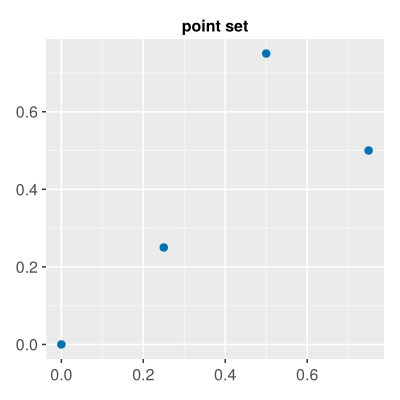

In [15]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

#ax = Axis(fig[1,2], title = "second point set")
#scatter!( Point2.(pts_r) )

#ax = Axis(fig[1,3], title = "third point set")
#scatter!( Point2.(pts_tr) )
fig

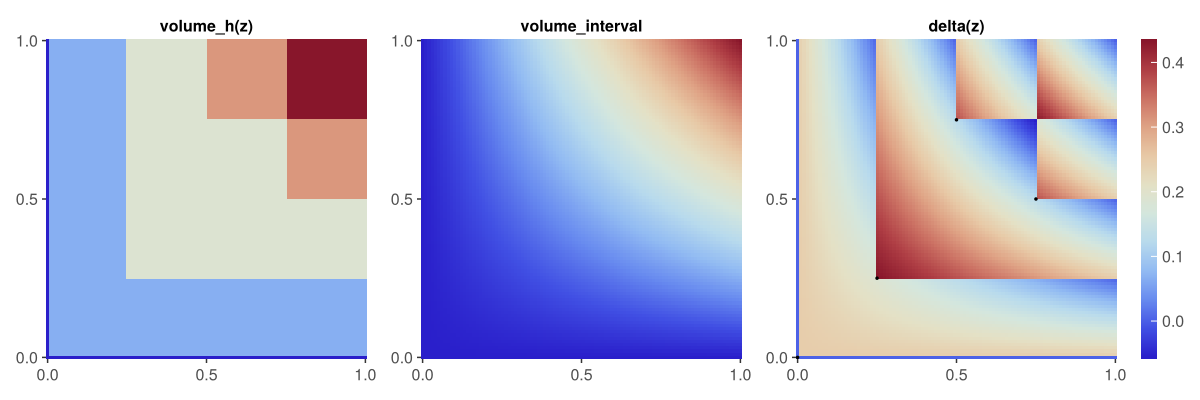

In [16]:
x = LinRange(0,1,100)
y = LinRange(0,1,100)
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title="volume_h(z)")
A = [vol_h((a,b),pts[1:end]) for a in x, b in y]
heatmap!(x,y, A, colormap = "thermometer"  )

ax = Axis(fig[1,2], title = "volume_interval")
B = [a*b for a in x, b in y]
heatmap!(x,y, B,colormap = "thermometer")

ax = Axis(fig[1,3], title = "delta(z)")
hm = heatmap!(x,y, A-B,colormap = "thermometer"  )
scatter!( Point2.(pts), color = :black, markersize = 5 )
Colorbar(fig[1,4], hm)
fig